This is being used to try out and visualize different methods of clustering.

In [57]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hcluster

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
pkl_file = open('../data/df.pkl', 'rb')
df = pickle.load(pkl_file)
pkl_file.close() 

In [8]:
features = ['top_elev_(ft)', 
            'bottom_elev_(ft)', 
            'vert_rise_(ft)', 
            'slope_length_(ft)', 
            'avg_width_(ft)', 
            'slope_area_(acres)', 
            'avg_grade_(%)', 
            'max_grade_(%)', 
            'groomed']

X = df[features].values

In [9]:
X
ss = StandardScaler()
X = ss.fit_transform(X)

In [32]:
km = KMeans(n_clusters=4)

In [33]:
km_labels = km.fit_predict(X)

In [34]:
gm = GaussianMixture(n_components=4)

In [35]:
gmm = gm.fit(X)

In [36]:
gm_labels = gmm.predict(X)

In [37]:
pca = PCA(n_components=2)

In [38]:
pca_mod = pca.fit_transform(X)

In [39]:
pca_mod

array([[ 2.8521369 , -0.25040679],
       [ 1.84450237, -1.87684579],
       [ 2.02740853, -1.68720825],
       ..., 
       [-3.59626217,  0.22597847],
       [-3.39714525,  0.16942425],
       [-3.18796784,  0.24473116]])

In [48]:
km_labels, gm_labels

(array([1, 1, 1, ..., 0, 0, 0], dtype=int32), array([3, 3, 3, ..., 0, 0, 0]))

In [54]:
np.where(km_labels == 1)[0].shape

(399,)

In [53]:
np.where(gm_labels == 3)[0].shape

(625,)

In [25]:
color_num_array = df.color_nums.values

In [28]:
def plot_iterations(iterations, data, plotname = None):
    '''
    iterations is a list, data is a np array
    '''
    fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(12,8))
    ax = ax.flatten()

    init_points = data[:3]
    for j, it in enumerate(iterations):
        km = KMeans(n_clusters=4, n_init=1, max_iter=it, \
                    random_state=0, n_jobs=-1)
        km.fit(data)
        cents = km.cluster_centers_
        labels = km.labels_
        ax[j].scatter(data[:,0], data[:,1], s=10, c= labels, cmap = 'cool', alpha = 0.6)
        ax[j].scatter(cents[:,0], cents[:,1], s=50, c= 'k', label = 'centroids')
        ax[j].set_title('{} iterations'.format(it))

    plt.tight_layout()
    if plotname:
        plt.savefig(plotname)
    else:
        plt.show()

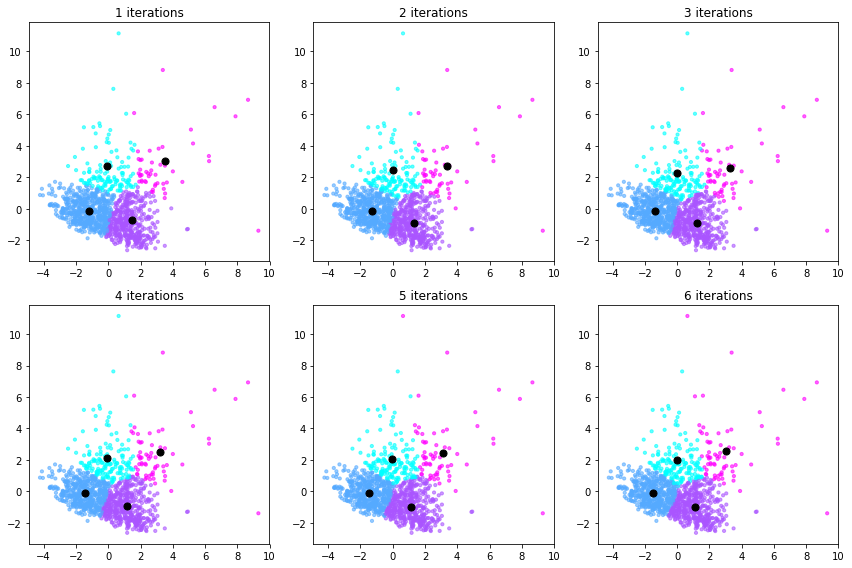

In [29]:
plot_iterations(range(1,7),pca_mod)

In [30]:
color_num_array

array([4, 4, 4, ..., 1, 1, 1])

In [40]:
km_labels

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [42]:
label_df = pd.DataFrame(columns = ['color', 'km_label', 'gm_label'])

In [47]:
label_df.color = color_num_array
label_df.km_label = km_labels
label_df.gm_label = gm_labels

In [56]:
label_df.groupby(['km_label','gm_label']).describe()

color                                              
                   count      mean       std  min   25%  50%  75%  max
km_label gm_label                                                     
0        0           1.0  1.000000       NaN  1.0  1.00  1.0  1.0  1.0
         1         106.0  1.830189  0.810311  1.0  1.00  2.0  2.0  4.0
         2         303.0  1.551155  0.572427  1.0  1.00  2.0  2.0  3.0
         3          11.0  1.363636  0.504525  1.0  1.00  1.0  2.0  2.0
1        1         382.0  2.984293  0.574858  2.0  3.00  3.0  3.0  4.0
         2          12.0  2.583333  0.668558  2.0  2.00  2.5  3.0  4.0
         3           5.0  2.800000  1.095445  2.0  2.00  2.0  4.0  4.0
2        1          47.0  3.000000  0.589768  2.0  3.00  3.0  3.0  4.0
         2          40.0  2.000000  0.640513  1.0  2.00  2.0  2.0  3.0
         3          52.0  2.288462  0.914728  1.0  1.75  2.0  3.0  4.0
3        0           5.0  2.400000  0.547723  2.0  2.00  2.0  3.0  3.0
         1          90.0  2.344444  0.823273  1.0  2.00  3.0  3.0  4.0
         2          67.0  1.776119  0.517011  1.0  1.00  2.0  2.0  3.0
         3           4.0  1.500000  0.577350  1.0  1.00  1.5  2.0  2.0

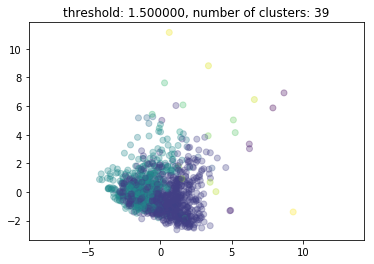

In [61]:
# clustering
thresh = 1.5
clusters = hcluster.fclusterdata(X, thresh, criterion="distance")

# plotting
plt.scatter(pca_mod[:,0],pca_mod[:,1], c=clusters,alpha = .3)
plt.axis("equal")
title = "threshold: %f, number of clusters: %d" % (thresh, len(set(clusters)))
plt.title(title)
plt.show()